In [2]:
import torch

In [3]:
e = torch.cuda.is_available() 
print(e)

False


In [4]:
import os
print(os.getcwd())

C:\Users\Administrator\Desktop\APE_Project\DeepLabCut-master


In [5]:
!pip install ipywidgets
!pip install wxPython


In [2]:
import deeplabcut

Loading DLC 2.2.2...


In [3]:
deeplabcut.__version__

'2.2.2'

In [4]:
# project_name = "HPE"
# experimenter = "Kim"
# video_path = [
#     "C:/Users/Administrator/Desktop/human/train1.mp4"
    
# ]
# deeplabcut.create_new_project(
#    project_name,
#    experimenter,
#    video_path,
#    multianimal=False
# )

Created "C:\Users\Administrator\Desktop\APE_Project\DeepLabCut-master\HPE-Kim-2022-09-29\videos"
Created "C:\Users\Administrator\Desktop\APE_Project\DeepLabCut-master\HPE-Kim-2022-09-29\labeled-data"
Created "C:\Users\Administrator\Desktop\APE_Project\DeepLabCut-master\HPE-Kim-2022-09-29\training-datasets"
Created "C:\Users\Administrator\Desktop\APE_Project\DeepLabCut-master\HPE-Kim-2022-09-29\dlc-models"
Attempting to create a symbolic link of the video ...
Created the symlink of C:\Users\Administrator\Desktop\human\train1.mp4 to C:\Users\Administrator\Desktop\APE_Project\DeepLabCut-master\HPE-Kim-2022-09-29\videos\train1.mp4
Created the symlink of C:\Users\Administrator\Desktop\human\test1.mp4 to C:\Users\Administrator\Desktop\APE_Project\DeepLabCut-master\HPE-Kim-2022-09-29\videos\test1.mp4
C:\Users\Administrator\Desktop\APE_Project\DeepLabCut-master\HPE-Kim-2022-09-29\videos\train1.mp4
C:\Users\Administrator\Desktop\APE_Project\DeepLabCut-master\HPE-Kim-2022-09-29\videos\test1.mp4


'C:\\Users\\Administrator\\Desktop\\APE_Project\\DeepLabCut-master\\HPE-Kim-2022-09-29\\config.yaml'

In [33]:
config_path = 'C:\\Users\\Administrator\\Desktop\\APE_Project\\DeepLabCut-master\\HPE-Kim-2022-09-29\\config.yaml'

In [6]:
deeplabcut.extract_frames(
    config_path,
    mode="automatic",
    algo="kmeans",
    userfeedback=False,
)

Config file read successfully.
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 10.62  seconds.
Extracting and downsampling... 255  frames from the video.


255it [00:01, 166.56it/s]
D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 5120 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Kmeans clustering ... (this might take a while)
Frames were successfully extracted, for the videos listed in the config.yaml file.

You can now label the frames using the function 'label_frames' (Note, you should label frames extracted from diverse videos (and many videos; we do not recommend training on single videos!)).


In [21]:
# Train datasets frame별 이미지에 마커 제작 UI
deeplabcut.label_frames(config_path)

You can now check the labels, using 'check_labels' before proceeding. Then, you can use the function 'create_training_dataset' to create the training dataset.


In [22]:
## deeplabcut.label_frames으로 체크한 이미지들 생성
deeplabcut.check_labels(
    config_path,
    draw_skeleton=True,
)

Creating images with labels by Kim.


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.53it/s]

If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


In [23]:
# deeplabcut.label_frames으로 체크한 이미지들의 마커 위치 csv파일 생성
deeplabcut.create_training_dataset(config_path, augmenter_type='imgaug')

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


[(0.95, 1, (array([7, 2, 0, 6, 8, 9, 4, 5, 1]), array([3])))]

In [24]:
deeplabcut.train_network(
    config_path, shuffle=1, saveiters=100, displayiters=500,maxiters=10000
)

Config:
{'all_joints': [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]],
 'all_joints_names': ['Hip_R',
                      'Knee_R',
                      'Ankle_R',
                      'Heel_R',
                      'Foot_R',
                      'Hip_L',
                      'Knee_L',
                      'Ankle_L',
                      'Heel_L',
                      'Foot_L'],
 'alpha_r': 0.02,
 'apply_prob': 0.5,
 'batch_size': 1,
 'contrast': {'clahe': True,
              'claheratio': 0.1,
              'histeq': True,
              'histeqratio': 0.1},
 'convolution': {'edge': False,
                 'emboss': {'alpha': [0.0, 1.0], 'strength': [0.5, 1.5]},
                 'embossratio': 0.1,
                 'sharpen': False,
                 'sharpenratio': 0.3},
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_HPESep29\\HPE_Kim95shuffle1.mat',
 'dataset_type': 'imgaug',
 'decay_steps': 30000,
 'deterministic': Fal

Selecting single-animal trainer
Batch Size is 1


D:\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\anaconda3\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Loading ImageNet-pretrained resnet_50
Max_iters overwritten as 10000
Display_iters overwritten as 500
Save_iters overwritten as 100
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': 'C:\\Users\\Administrator\\Desktop\\APE_Project\\DeepLabCut-master\\HPE-Kim-2022-09-29\\dlc-models\\iteration-0\\HPESep29-trainset95shuffle1\\train\\snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'crop_pad': 0, 'scoremap_dir': 'test', 'batch_size': 1, 'dataset_type': 'imgaug', 'deterministic': False, 'mirror': False, 'pairwise_huber_loss': False, 'weigh_only_present_joints': False, 'partaffinityfield_predict': False, 'pai

iteration: 500 loss: 0.0289 lr: 0.005
iteration: 1000 loss: 0.0150 lr: 0.005
iteration: 1500 loss: 0.0118 lr: 0.005
iteration: 2000 loss: 0.0096 lr: 0.005
iteration: 2500 loss: 0.0083 lr: 0.005
iteration: 3000 loss: 0.0073 lr: 0.005
iteration: 3500 loss: 0.0067 lr: 0.005
iteration: 4000 loss: 0.0063 lr: 0.005
iteration: 4500 loss: 0.0061 lr: 0.005
iteration: 5000 loss: 0.0057 lr: 0.005
iteration: 5500 loss: 0.0054 lr: 0.005
iteration: 6000 loss: 0.0050 lr: 0.005
iteration: 6500 loss: 0.0051 lr: 0.005
iteration: 7000 loss: 0.0049 lr: 0.005
iteration: 7500 loss: 0.0047 lr: 0.005
iteration: 8000 loss: 0.0045 lr: 0.005
iteration: 8500 loss: 0.0045 lr: 0.005
iteration: 9000 loss: 0.0042 lr: 0.005
iteration: 9500 loss: 0.0042 lr: 0.005
iteration: 10000 loss: 0.0041 lr: 0.005
Exception in thread Thread-10:
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\tensorflow\python\client\session.py", line 1377, in _do_call
    return fn(*args)
  File "D:\anaconda3\lib\site-pac

The network is now trained and ready to evaluate. Use the function 'evaluate_network' to evaluate the network.


Config:
{'all_joints': [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]],
 'all_joints_names': ['Hip_R',
                      'Knee_R',
                      'Ankle_R',
                      'Heel_R',
                      'Foot_R',
                      'Hip_L',
                      'Knee_L',
                      'Ankle_L',
                      'Heel_L',
                      'Foot_L'],
 'batch_size': 1,
 'crop_pad': 0,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_HPESep29\\HPE_Kim95shuffle1.mat',
 'dataset_type': 'imgaug',
 'deterministic': False,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\Administrator\\Desktop\\APE_Project\\DeepLabCut-master\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 1.0,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'mean

Running  DLC_resnet50_HPESep29shuffle1_10000  with # of training iterations: 10000


D:\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\anaconda3\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running evaluation ...


10it [00:01,  9.29it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-10000
Results for 10000  training iterations: 95 1 train error: 12.93 pixels. Test error: 70.85  pixels.
With pcutoff of 0.6  train error: 8.04 pixels. Test error: 84.3 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.16it/s]

The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
Please check the results, then choose the best model (snapshot) for prediction. You can update the config.yaml file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise, consider adding more labeled-data and retraining the network (see DeepLabCut workflow Fig 2, Nath 2019)


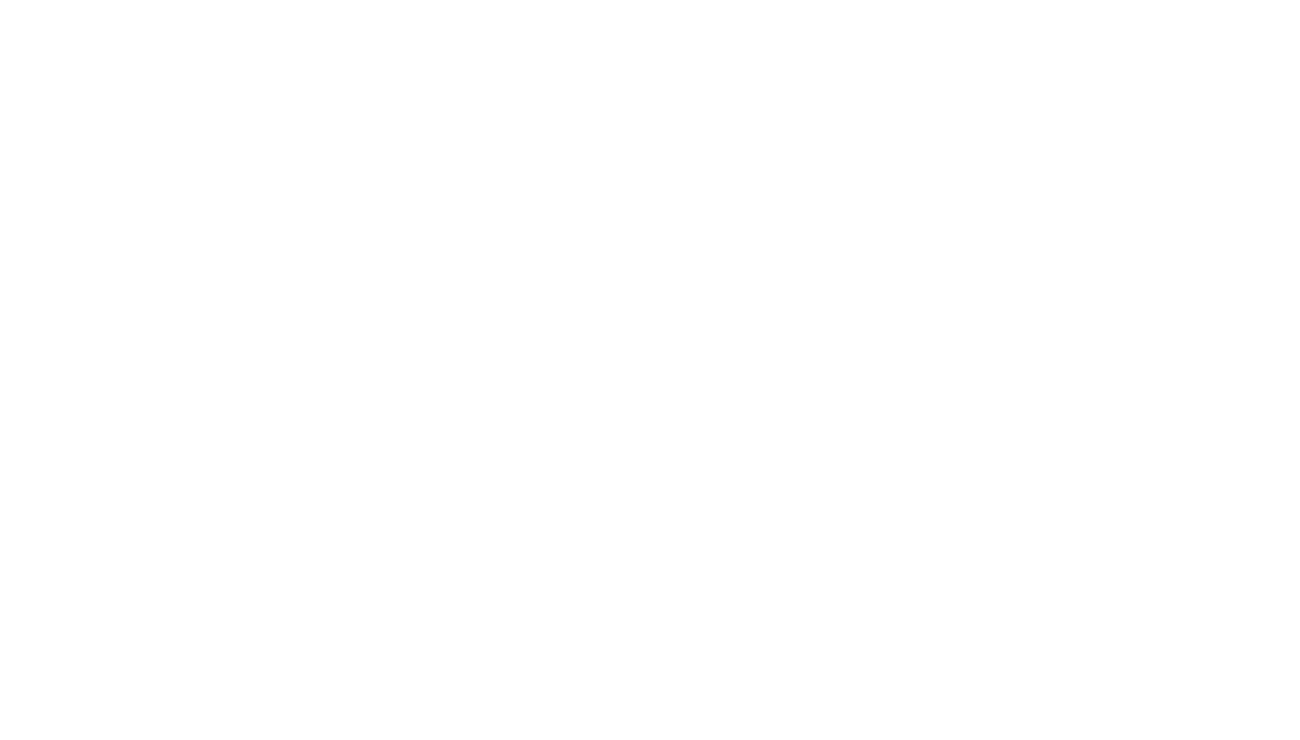

In [25]:
deeplabcut.evaluate_network(
    config_path,
    plotting=True,
)

In [28]:
video_path='C:\\Users\\Administrator\\Desktop\\APE_Project\\DeepLabCut-master\\HPE-Kim-2022-09-29\\videos/test1.mp4'

In [29]:
# video analysis -> csv file
deeplabcut.analyze_videos(config_path,
                          video_path,
                          save_as_csv=True)

Config:
{'all_joints': [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]],
 'all_joints_names': ['Hip_R',
                      'Knee_R',
                      'Ankle_R',
                      'Heel_R',
                      'Foot_R',
                      'Hip_L',
                      'Knee_L',
                      'Ankle_L',
                      'Heel_L',
                      'Foot_L'],
 'batch_size': 1,
 'crop_pad': 0,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_HPESep29\\HPE_Kim95shuffle1.mat',
 'dataset_type': 'imgaug',
 'deterministic': False,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\Administrator\\Desktop\\APE_Project\\DeepLabCut-master\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 1.0,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'mean

Using snapshot-10000 for model C:\Users\Administrator\Desktop\APE_Project\DeepLabCut-master\HPE-Kim-2022-09-29\dlc-models\iteration-0\HPESep29-trainset95shuffle1
Starting to analyze %  C:\Users\Administrator\Desktop\APE_Project\DeepLabCut-master\HPE-Kim-2022-09-29\videos/test1.mp4
Loading  C:\Users\Administrator\Desktop\APE_Project\DeepLabCut-master\HPE-Kim-2022-09-29\videos/test1.mp4
Duration of video [s]:  9.12 , recorded with  24.0 fps!
Overall # of frames:  219  found with (before cropping) frame dimensions:  1280 720
Starting to extract posture


 96%|████████████████████████████████████████████████████████████████████████████▋   | 210/219 [00:09<00:00, 22.85it/s]

Saving results in C:\Users\Administrator\Desktop\APE_Project\DeepLabCut-master\HPE-Kim-2022-09-29\videos...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.


'DLC_resnet50_HPESep29shuffle1_10000'

In [31]:
# result plot
deeplabcut.plot_trajectories(config_path, video_path)

Loading  C:\Users\Administrator\Desktop\APE_Project\DeepLabCut-master\HPE-Kim-2022-09-29\videos/test1.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory


In [34]:
# dot video
# deeplabcut.create_labeled_video(config_path, video_path, save_frames = False)

# dot and skeleton video
deeplabcut.create_labeled_video(config_path, video_path,
                                videotype='mp4', draw_skeleton=True)

# # dot and dot trajectory video
# deeplabcut.create_labeled_video(config_path, video_path,
#                                 videotype='mp4', trailpoints=7)

In [44]:
deeplabcut.convert_detections2tracklets(
    config_path,
    video_path,
    track_method="ellipse",
)

KeyError: 'multianimalbodyparts'

In [ ]:
deeplabcut.convert_detections2tracklets(
    config_path,
    [video],
    track_method="ellipse",
)

In [ ]:
deeplabcut.create_labeled_video(
    config_path,
    [video],
    color_by="individual",
    keypoints_only=False,
    trailpoints=10,
    draw_skeleton=False,
    track_method="ellipse",
)